Équivalence Structurelle: {frozenset({1, 2}): [0], frozenset({0, 3}): [1, 2], frozenset({8, 1, 2}): [3], frozenset({5, 6}): [4], frozenset({4, 7}): [5, 6], frozenset({8, 5, 6}): [7], frozenset({3, 7}): [8]}
Équivalence Régulière: {(2, 2): [0, 4], (2, 3): [1, 2, 5, 6], (2, 2, 2): [3, 7], (3, 3): [8]}


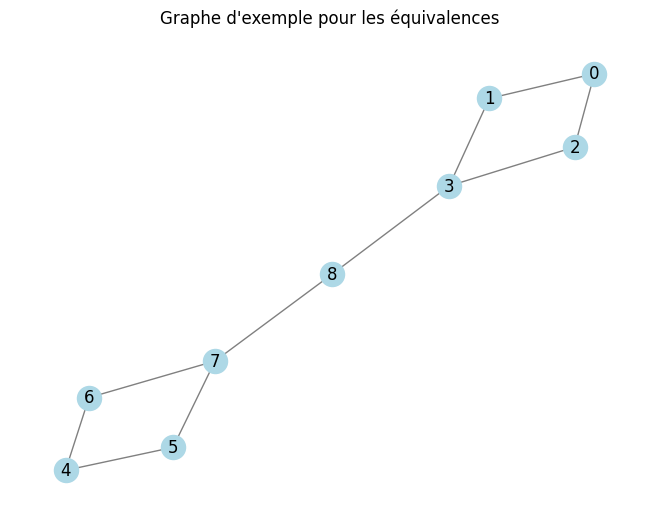

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Création d'un graphe simple
G = nx.Graph()
edges = [(0, 1), (0, 2), (1, 3), (2, 3), (4, 5), (4, 6), (5, 7), (6, 7), (3, 8), (7, 8)]
G.add_edges_from(edges)

# Équivalence structurelle (simplifiée pour illustration)
# Deux nœuds sont structurellement équivalents s'ils ont les mêmes voisins
def structural_equivalence(G):
    equivalence_classes = {}
    for node in G.nodes():
        neighbors = set(G.neighbors(node))
        if frozenset(neighbors) in equivalence_classes:
            equivalence_classes[frozenset(neighbors)].append(node)
        else:
            equivalence_classes[frozenset(neighbors)] = [node]
    return equivalence_classes

# Équivalence régulière (simplifiée pour illustration)
# Deux nœuds sont régulièrement équivalents s'ils ont des relations similaires avec des ensembles de nœuds
# Nous utilisons ici une approche heuristique basée sur les degrés des voisins
def regular_equivalence(G):
    equivalence_classes = {}
    for node in G.nodes():
        degrees = sorted([G.degree(neigh) for neigh in G.neighbors(node)])
        if tuple(degrees) in equivalence_classes:
            equivalence_classes[tuple(degrees)].append(node)
        else:
            equivalence_classes[tuple(degrees)] = [node]
    return equivalence_classes

# Calcul des équivalences
structural_eq = structural_equivalence(G)
regular_eq = regular_equivalence(G)

print("Équivalence Structurelle:", structural_eq)
print("Équivalence Régulière:", regular_eq)

# Visualisation
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

plt.title("Graphe d'exemple pour les équivalences")
plt.show()
